# Gold extraction predictor model

# Project description

[Zyfra](zyfra.com) tasked me with developing a prototype model capable of predicting the amount of pure gold that can be extracted from gold ore. This model could improve the efficiency of the production process by eliminating parameters that do not contribute to profit.



# Loading libraries

In [1]:
# For dataframe manipulation
import pandas as pd

# For calculations
import numpy as np

# scikit-learn
# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

## Tools
from sklearn.preprocessing import StandardScaler

## Metrics
from sklearn.metrics import mean_absolute_error, make_scorer, mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Loading datasets

In [2]:
# Reading the datasets
# If run locally on Windows:
try:
    data_full = pd.read_csv('datasets/gold_recovery_full.csv')
    data_train = pd.read_csv('datasets/gold_recovery_train.csv')
    data_test = pd.read_csv('datasets/gold_recovery_test.csv')

# If run on the platform:
except:
    data_full = pd.read_csv('/datasets/gold_recovery_full.csv')
    data_train = pd.read_csv('/datasets/gold_recovery_train.csv')
    data_test = pd.read_csv('/datasets/gold_recovery_test.csv')

# Data preprocessing

## Preliminary checking

In [3]:
# data_full
data_full.info()
data_full.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


In [4]:
# data_train
data_train.info()
data_train.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


In [5]:
# data_test
data_test.info()
data_test.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
5,2016-09-01 05:59:59,168.485085,8.817007,7.420000,0.791191,1402.826803,-499.299521,1401.511119,-499.205357,1404.088107,...,12.029797,-499.814895,8.036586,-500.371492,8.041446,-510.037054,4.983949,-499.990990,24.978973,-500.475640
6,2016-09-01 06:59:59,144.133440,7.924610,7.420000,0.788838,1398.252401,-499.748672,1393.255503,-499.195380,1396.738566,...,12.026296,-499.473127,8.027984,-500.983079,7.907340,-507.964971,5.010224,-500.043697,25.040709,-499.501984
7,2016-09-01 07:59:59,133.513396,8.055252,6.988000,0.801871,1401.669677,-501.777839,1400.754446,-502.514024,1400.465244,...,12.040911,-501.293852,8.020490,-499.185229,8.116897,-511.927561,5.036498,-500.149615,25.032580,-503.970657
8,2016-09-01 08:59:59,133.735356,7.999618,6.935000,0.789329,1402.358981,-499.981597,1400.985954,-496.802968,1401.168584,...,11.998184,-499.481608,8.012610,-500.896783,7.974422,-521.199104,5.061599,-499.791519,25.005063,-497.613716
9,2016-09-01 09:59:59,126.961069,8.017856,7.030000,0.805298,1400.816120,-499.014158,1399.975401,-499.570552,1401.871924,...,12.040725,-499.987743,7.989503,-499.750625,7.989710,-509.946737,5.068811,-499.293900,24.992741,-499.272255


In [49]:
# Checking for duplicates
## data_full
print(data_full['date'].duplicated().sum())

## data_train
print(data_train['date'].duplicated().sum())

## data_test
print(data_test['date'].duplicated().sum())

0
0
0


Findings:
- All sets have missing values in every column (except for `date`). 
- None of the observations are duplicates.
- Some columns are not present in the test set. 
- `date` columns are stored as `object`s.

We will inspect these findings in more detail in the following sections.

It's also worth noting that we were not provided with a validation set.

## Data type conversion

`date` columns in every dataset are listed as `object`s. We can change them into columns of type `datetime` to make preprocessing easier.

In [6]:
# data_full
data_full['date'] = pd.to_datetime(data_full['date'], format='%Y-%m-%d %H:%M:%S')
print(data_full.info())
print()

# data_train
data_train['date'] = pd.to_datetime(data_train['date'], format='%Y-%m-%d %H:%M:%S')
print(data_train.info())
print()

# data_test
data_test['date'] = pd.to_datetime(data_test['date'], format='%Y-%m-%d %H:%M:%S')
print(data_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                19439 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         19438 non-null  float64       
 2   final.output.concentrate_pb                         19438 non-null  float64       
 3   final.output.concentrate_sol                        19228 non-null  float64       
 4   final.output.concentrate_au                         19439 non-null  float64       
 5   final.output.recovery                               19439 non-null  float64       
 6   final.output.tail_ag                                19438 non-null  float64       
 7   final.output.tail_pb                                19338 non-null  float64       
 8   final.

## Column discrepancy

Some columns are present in the training and full sets, but not in the test set. We'll see what they are and why.

In [7]:
# Creating dataframes
# containing column names of the training and test sets
train_columns = pd.DataFrame(data_train.columns.tolist(), columns=['columns'])
test_columns = pd.DataFrame(data_test.columns.tolist(), columns=['columns'])

# Inner merging the two dataframes to get the shared columns
shared_columns = pd.merge(train_columns, test_columns, on='columns', how='inner')

# Getting the columns that are only present in the training set
# Filtering `train_columns` by values not present in `test_columns`
train_only_columns = train_columns[~(train_columns['columns'].isin(test_columns['columns']))]

# Displaying information
print('Number of all columns in training set:', len(train_columns))
print('Number of shared columns:', len(shared_columns))
print('Number of columns only found in training set:', len(train_only_columns))

train_only_columns

Number of all columns in training set: 87
Number of shared columns: 53
Number of columns only found in training set: 34


,columns
1,final.output.concentrate_ag
2,final.output.concentrate_pb
3,final.output.concentrate_sol
4,final.output.concentrate_au
5,final.output.recovery
6,final.output.tail_ag
7,final.output.tail_pb
8,final.output.tail_sol
9,final.output.tail_au
14,primary_cleaner.output.concentrate_ag


In [8]:
# Checking data_test dates
data_test

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5851,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5852,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5853,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5854,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


In [9]:
# Getting the list of columns exclusive to the training set
train_only_columns_list = train_only_columns.values.tolist()

# Flattening the list
temp_list = ['date']
for sublist in train_only_columns_list:
    for item in sublist:
        temp_list.append(item)
train_only_columns_list = temp_list
    
# Showing the rows in data_full that have the same dates as the test set
data_full[data_full['date'] > '2016-09-01 00:00:00'][train_only_columns_list]

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au
4682,2016-09-01 00:59:59,7.578381,10.466295,11.990938,40.743891,70.273583,12.688885,3.844413,11.075686,4.537988,...,22.186207,89.993421,5.936471,0.747425,14.787965,2.371757,16.484844,4.413600,12.034406,5.560988
4683,2016-09-01 01:59:59,7.813838,10.581152,12.216172,39.604292,68.910432,12.829171,3.918901,11.132824,4.675117,...,22.638279,88.089657,6.166142,0.830029,13.658590,2.647449,16.751419,4.596745,12.248071,5.790078
4684,2016-09-01 02:59:59,7.623392,10.424024,12.313710,40.724190,68.143213,12.977846,4.026561,10.990134,4.828907,...,21.788301,88.412756,6.156985,0.879182,13.014110,2.750630,17.274800,4.779149,12.311438,6.049673
4685,2016-09-01 03:59:59,8.552457,10.503229,13.074570,39.290997,67.776393,12.451947,3.780702,11.155935,4.969620,...,23.222572,87.360133,6.031036,0.971844,12.954804,2.842182,17.242896,4.417439,12.388268,5.911119
4686,2016-09-01 04:59:59,8.078781,10.222788,12.475427,40.254524,61.467078,11.827846,3.632272,11.403663,5.256806,...,23.741428,83.236367,6.417518,1.081451,13.832339,3.132740,16.980186,4.618366,12.947386,7.466258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19434,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,18.603550,89.574376,4.207261,0.612935,16.666590,0.748633,0.000000,0.000000,0.000000,0.000000
19435,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,18.441436,87.724007,4.177943,0.650557,16.960649,0.771582,0.000000,0.000000,0.000000,0.000000
19436,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,15.111231,88.890579,4.050010,0.636095,18.323080,0.685059,0.000000,0.000000,0.000000,0.000000
19437,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,17.834772,89.858126,3.902494,0.625609,19.423740,0.567130,0.000000,0.000000,0.000000,0.000000


Apparently, we can find all of the columns and their values (which are missing from the test set) in the full set. We can simply merge the two dataframes to get the complete data.

In [10]:
data_test = pd.merge(data_test, data_full[train_only_columns_list], on='date', how='left')

# Reordering columns to match training set
columns = data_train.columns.tolist()
data_test = data_test[columns]

data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5856 entries, 0 to 5855
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                5856 non-null   datetime64[ns]
 1   final.output.concentrate_ag                         5290 non-null   float64       
 2   final.output.concentrate_pb                         5290 non-null   float64       
 3   final.output.concentrate_sol                        5290 non-null   float64       
 4   final.output.concentrate_au                         5290 non-null   float64       
 5   final.output.recovery                               5290 non-null   float64       
 6   final.output.tail_ag                                5289 non-null   float64       
 7   final.output.tail_pb                                5289 non-null   float64       
 8   final.ou

## Treating missing values

In [11]:
dict(data_full.isna().sum())

{'date': 0,
 'final.output.concentrate_ag': 1,
 'final.output.concentrate_pb': 1,
 'final.output.concentrate_sol': 211,
 'final.output.concentrate_au': 0,
 'final.output.recovery': 0,
 'final.output.tail_ag': 1,
 'final.output.tail_pb': 101,
 'final.output.tail_sol': 6,
 'final.output.tail_au': 0,
 'primary_cleaner.input.sulfate': 24,
 'primary_cleaner.input.depressant': 37,
 'primary_cleaner.input.feed_size': 0,
 'primary_cleaner.input.xanthate': 104,
 'primary_cleaner.output.concentrate_ag': 0,
 'primary_cleaner.output.concentrate_pb': 116,
 'primary_cleaner.output.concentrate_sol': 370,
 'primary_cleaner.output.concentrate_au': 0,
 'primary_cleaner.output.tail_ag': 4,
 'primary_cleaner.output.tail_pb': 21,
 'primary_cleaner.output.tail_sol': 62,
 'primary_cleaner.output.tail_au': 0,
 'primary_cleaner.state.floatbank8_a_air': 4,
 'primary_cleaner.state.floatbank8_a_level': 1,
 'primary_cleaner.state.floatbank8_b_air': 4,
 'primary_cleaner.state.floatbank8_b_level': 1,
 'primary_clean

In [12]:
dict(data_test.isna().sum())

{'date': 0,
 'final.output.concentrate_ag': 566,
 'final.output.concentrate_pb': 566,
 'final.output.concentrate_sol': 566,
 'final.output.concentrate_au': 566,
 'final.output.recovery': 566,
 'final.output.tail_ag': 567,
 'final.output.tail_pb': 567,
 'final.output.tail_sol': 567,
 'final.output.tail_au': 566,
 'primary_cleaner.input.sulfate': 302,
 'primary_cleaner.input.depressant': 284,
 'primary_cleaner.input.feed_size': 0,
 'primary_cleaner.input.xanthate': 166,
 'primary_cleaner.output.concentrate_ag': 566,
 'primary_cleaner.output.concentrate_pb': 596,
 'primary_cleaner.output.concentrate_sol': 650,
 'primary_cleaner.output.concentrate_au': 566,
 'primary_cleaner.output.tail_ag': 569,
 'primary_cleaner.output.tail_pb': 572,
 'primary_cleaner.output.tail_sol': 582,
 'primary_cleaner.output.tail_au': 566,
 'primary_cleaner.state.floatbank8_a_air': 16,
 'primary_cleaner.state.floatbank8_a_level': 16,
 'primary_cleaner.state.floatbank8_b_air': 16,
 'primary_cleaner.state.floatbank8

In [13]:
dict(data_train.isna().sum())

{'date': 0,
 'final.output.concentrate_ag': 72,
 'final.output.concentrate_pb': 72,
 'final.output.concentrate_sol': 370,
 'final.output.concentrate_au': 71,
 'final.output.recovery': 1521,
 'final.output.tail_ag': 66,
 'final.output.tail_pb': 183,
 'final.output.tail_sol': 145,
 'final.output.tail_au': 66,
 'primary_cleaner.input.sulfate': 1307,
 'primary_cleaner.input.depressant': 1262,
 'primary_cleaner.input.feed_size': 0,
 'primary_cleaner.input.xanthate': 985,
 'primary_cleaner.output.concentrate_ag': 82,
 'primary_cleaner.output.concentrate_pb': 358,
 'primary_cleaner.output.concentrate_sol': 636,
 'primary_cleaner.output.concentrate_au': 82,
 'primary_cleaner.output.tail_ag': 83,
 'primary_cleaner.output.tail_pb': 99,
 'primary_cleaner.output.tail_sol': 281,
 'primary_cleaner.output.tail_au': 83,
 'primary_cleaner.state.floatbank8_a_air': 40,
 'primary_cleaner.state.floatbank8_a_level': 33,
 'primary_cleaner.state.floatbank8_b_air': 40,
 'primary_cleaner.state.floatbank8_b_leve

In [14]:
pd.options.display.max_columns = None # default=20

data_full[data_full.isna().any(axis=1)].head(15)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
47,2016-01-16 23:00:00,4.591462,10.628846,5.688961,46.663335,55.088448,10.694584,1.671644,17.910312,2.686782,126.397495,12.709727,7.25,1.229626,8.092185,9.719728,19.077471,38.624404,15.911266,3.269298,7.095597,3.513846,1601.301169,-498.725777,1605.370031,-500.644437,1598.360694,-500.461991,1604.014273,-501.824136,35990.036451,3220.710538,3206.895723,3.168669,7.934791,1.763437,229.379445,40.601032,NaN,5.587750,10.865871,5.648950,10.786929,5.638302,0.000000,0.000000,0.000000,0.000000,0.000000,4.990718,0.901107,19.096033,2.126460,1003.354806,-501.078303,1603.648910,-498.000810,1603.488420,-495.577057,1402.004381,-497.117094,1203.394353,-494.391170,1202.592202,-500.167701,13.648648,5.146849,9.601115,3.108674,26.069763,-502.180953,24.044256,-502.252420,25.024571,-499.417407,23.983086,-499.931140,13.997488,-551.224653,11.971272,-550.095619,9.981163,-502.869109,7.941184,-500.623610,12.018837,-600.916665
48,2016-01-17 00:00:00,5.296830,10.597469,NaN,44.015642,41.962008,11.975654,1.846558,8.138408,2.889469,69.411904,7.443190,7.25,0.926251,7.680496,9.038210,18.68635

In [15]:
pd.options.display.max_columns = 20 # default=20

From the standpoint of data processing, it can be said that the missing values occur at random: some timestamps might not have produced any output of certain elements, passed through certain stages, or processed with certain equipments.

Missing values in columns indicating input or output can be filled with `0` to represent the absence of said materials, but missing values in other columns that indicate certain conditions in some stages cannot be filled due to risks of distorting the data and machine learning.

In [16]:
# Filtering columns that indicate states
full_columns = data_full.columns.to_list()
state_columns = [i for i in full_columns if 'state' in i]

# Getting the amount of rows with NaN in state_columns
state_na = data_full[data_full[state_columns].isna().any(axis=1)]
print(len(state_na) / len(data_full)) 
state_na.head()

0.03549565306857349


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
114,2016-01-21 10:00:00,5.782224,10.969985,9.301260,43.181003,74.257359,11.959760,2.064173,15.139256,3.091437,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
683,2016-02-15 10:00:00,8.857907,8.349109,NaN,44.174607,52.118942,11.224195,1.491018,6.526926,3.548897,...,17.964202,-446.595646,15.961823,-315.341074,15.944569,-488.232047,11.966396,-498.672382,25.015804,-498.642810
684,2016-02-15 11:00:00,6.106360,11.042916,NaN,42.520410,59.638066,10.608330,1.277839,12.465123,2.906240,...,18.008125,-388.595011,16.077463,-295.516586,16.003745,-509.706038,11.963636,-501.044706,25.018000,-500.316956
685,2016-02-15 12:00:00,6.975690,10.897133,9.336126,40.642564,67.452140,10.869656,1.326764,13.996151,2.409606,...,18.000943,-499.823119,15.970544,-505.646686,16.004155,-501.859423,11.931662,-500.084138,24.972760,-500.181898
2224,2016-05-10 12:59:59,5.600641,9.543393,8.683771,42.580912,67.687438,8.107438,1.900487,12.550528,2.705534,...,15.281775,-500.218429,13.254834,-499.307694,10.961954,-500.913820,5.961388,-500.610792,20.015071,-501.615067


Apparently, rows with missing columns in `state` columns only account for ~3.5% of the full data, so dropping these rows should only have negligible effects.

In [17]:
dict(data_train.isna().sum())

{'date': 0,
 'final.output.concentrate_ag': 72,
 'final.output.concentrate_pb': 72,
 'final.output.concentrate_sol': 370,
 'final.output.concentrate_au': 71,
 'final.output.recovery': 1521,
 'final.output.tail_ag': 66,
 'final.output.tail_pb': 183,
 'final.output.tail_sol': 145,
 'final.output.tail_au': 66,
 'primary_cleaner.input.sulfate': 1307,
 'primary_cleaner.input.depressant': 1262,
 'primary_cleaner.input.feed_size': 0,
 'primary_cleaner.input.xanthate': 985,
 'primary_cleaner.output.concentrate_ag': 82,
 'primary_cleaner.output.concentrate_pb': 358,
 'primary_cleaner.output.concentrate_sol': 636,
 'primary_cleaner.output.concentrate_au': 82,
 'primary_cleaner.output.tail_ag': 83,
 'primary_cleaner.output.tail_pb': 99,
 'primary_cleaner.output.tail_sol': 281,
 'primary_cleaner.output.tail_au': 83,
 'primary_cleaner.state.floatbank8_a_air': 40,
 'primary_cleaner.state.floatbank8_a_level': 33,
 'primary_cleaner.state.floatbank8_b_air': 40,
 'primary_cleaner.state.floatbank8_b_leve

In [18]:
train_coba = data_train.dropna(subset=state_columns)
dict(train_coba.isna().sum())

{'date': 0,
 'final.output.concentrate_ag': 9,
 'final.output.concentrate_pb': 9,
 'final.output.concentrate_sol': 302,
 'final.output.concentrate_au': 8,
 'final.output.recovery': 1280,
 'final.output.tail_ag': 3,
 'final.output.tail_pb': 120,
 'final.output.tail_sol': 73,
 'final.output.tail_au': 3,
 'primary_cleaner.input.sulfate': 1081,
 'primary_cleaner.input.depressant': 1041,
 'primary_cleaner.input.feed_size': 0,
 'primary_cleaner.input.xanthate': 837,
 'primary_cleaner.output.concentrate_ag': 1,
 'primary_cleaner.output.concentrate_pb': 244,
 'primary_cleaner.output.concentrate_sol': 493,
 'primary_cleaner.output.concentrate_au': 1,
 'primary_cleaner.output.tail_ag': 2,
 'primary_cleaner.output.tail_pb': 18,
 'primary_cleaner.output.tail_sol': 178,
 'primary_cleaner.output.tail_au': 2,
 'primary_cleaner.state.floatbank8_a_air': 0,
 'primary_cleaner.state.floatbank8_a_level': 0,
 'primary_cleaner.state.floatbank8_b_air': 0,
 'primary_cleaner.state.floatbank8_b_level': 0,
 'prim

In [19]:
# Handling missing values

# data_full
## Dropping rows with NaN values in state columns
data_full = data_full.dropna(subset=state_columns)

## Filling missing values in input/output columns
data_full = data_full.fillna(value=0)
print(data_full.info())
print()

# data_train
## Dropping rows with NaN values in state columns
data_train = data_train.dropna(subset=state_columns)

## Filling missing values in input/output columns
data_train = data_train.fillna(value=0)
print(data_train.info())
print()

# data_test
## Dropping rows with NaN values in state columns
data_test = data_test.dropna(subset=state_columns)

## Filling missing values in input/output columns
data_test = data_test.fillna(value=0)
print(data_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18749 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                18749 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         18749 non-null  float64       
 2   final.output.concentrate_pb                         18749 non-null  float64       
 3   final.output.concentrate_sol                        18749 non-null  float64       
 4   final.output.concentrate_au                         18749 non-null  float64       
 5   final.output.recovery                               18749 non-null  float64       
 6   final.output.tail_ag                                18749 non-null  float64       
 7   final.output.tail_pb                                18749 non-null  float64       
 8   final.

In [20]:
dict(data_full.isna().sum())

{'date': 0,
 'final.output.concentrate_ag': 0,
 'final.output.concentrate_pb': 0,
 'final.output.concentrate_sol': 0,
 'final.output.concentrate_au': 0,
 'final.output.recovery': 0,
 'final.output.tail_ag': 0,
 'final.output.tail_pb': 0,
 'final.output.tail_sol': 0,
 'final.output.tail_au': 0,
 'primary_cleaner.input.sulfate': 0,
 'primary_cleaner.input.depressant': 0,
 'primary_cleaner.input.feed_size': 0,
 'primary_cleaner.input.xanthate': 0,
 'primary_cleaner.output.concentrate_ag': 0,
 'primary_cleaner.output.concentrate_pb': 0,
 'primary_cleaner.output.concentrate_sol': 0,
 'primary_cleaner.output.concentrate_au': 0,
 'primary_cleaner.output.tail_ag': 0,
 'primary_cleaner.output.tail_pb': 0,
 'primary_cleaner.output.tail_sol': 0,
 'primary_cleaner.output.tail_au': 0,
 'primary_cleaner.state.floatbank8_a_air': 0,
 'primary_cleaner.state.floatbank8_a_level': 0,
 'primary_cleaner.state.floatbank8_b_air': 0,
 'primary_cleaner.state.floatbank8_b_level': 0,
 'primary_cleaner.state.float

In [21]:
dict(data_test.isna().sum())

{'date': 0,
 'final.output.concentrate_ag': 0,
 'final.output.concentrate_pb': 0,
 'final.output.concentrate_sol': 0,
 'final.output.concentrate_au': 0,
 'final.output.recovery': 0,
 'final.output.tail_ag': 0,
 'final.output.tail_pb': 0,
 'final.output.tail_sol': 0,
 'final.output.tail_au': 0,
 'primary_cleaner.input.sulfate': 0,
 'primary_cleaner.input.depressant': 0,
 'primary_cleaner.input.feed_size': 0,
 'primary_cleaner.input.xanthate': 0,
 'primary_cleaner.output.concentrate_ag': 0,
 'primary_cleaner.output.concentrate_pb': 0,
 'primary_cleaner.output.concentrate_sol': 0,
 'primary_cleaner.output.concentrate_au': 0,
 'primary_cleaner.output.tail_ag': 0,
 'primary_cleaner.output.tail_pb': 0,
 'primary_cleaner.output.tail_sol': 0,
 'primary_cleaner.output.tail_au': 0,
 'primary_cleaner.state.floatbank8_a_air': 0,
 'primary_cleaner.state.floatbank8_a_level': 0,
 'primary_cleaner.state.floatbank8_b_air': 0,
 'primary_cleaner.state.floatbank8_b_level': 0,
 'primary_cleaner.state.float

In [22]:
dict(data_train.isna().sum())

{'date': 0,
 'final.output.concentrate_ag': 0,
 'final.output.concentrate_pb': 0,
 'final.output.concentrate_sol': 0,
 'final.output.concentrate_au': 0,
 'final.output.recovery': 0,
 'final.output.tail_ag': 0,
 'final.output.tail_pb': 0,
 'final.output.tail_sol': 0,
 'final.output.tail_au': 0,
 'primary_cleaner.input.sulfate': 0,
 'primary_cleaner.input.depressant': 0,
 'primary_cleaner.input.feed_size': 0,
 'primary_cleaner.input.xanthate': 0,
 'primary_cleaner.output.concentrate_ag': 0,
 'primary_cleaner.output.concentrate_pb': 0,
 'primary_cleaner.output.concentrate_sol': 0,
 'primary_cleaner.output.concentrate_au': 0,
 'primary_cleaner.output.tail_ag': 0,
 'primary_cleaner.output.tail_pb': 0,
 'primary_cleaner.output.tail_sol': 0,
 'primary_cleaner.output.tail_au': 0,
 'primary_cleaner.state.floatbank8_a_air': 0,
 'primary_cleaner.state.floatbank8_a_level': 0,
 'primary_cleaner.state.floatbank8_b_air': 0,
 'primary_cleaner.state.floatbank8_b_level': 0,
 'primary_cleaner.state.float

## Predicted vs. actual gold output

Before we create our model, we should first consider whether or not the actual data reflect the ideal, expected output. Ideally, the flotation processes should yield a gold output with an amount specified in this formula:

$$
    output = \frac{C \times (F-T)}{F \times (C-T)}\ \times 100\%
$$

where
- *C* (concentrate): percentage of gold in the concentrate. The concentrate in question is either
    1. the direct product of flotation (when calculating for the output of the rough concentrate), or
    1. the product of purification (when calculating for output of the final concentrate).
- *F* (feed): percentage of gold in the feed. The feed in question is either
    1. the feed prior to flotation (when calculating for the output of the rough concentrate), or
    1. the concentrate, the direct product of flotation (when calculating for output of the final concentrate).
- *T* (tail): percentage of gold in the tail. The tail is either
    1. the direct product of flotation (when calculating for the output of the rough concentrate)
    1. the product of purification (when calculating for output of the final concentrate).
    
To make sure that the whole process is going effectively, we need to find out whether or not the actual amount of recovered output from the flotation (`rougher.output.recovery`) follows this formula. We will use the training set for this purpose.

In [23]:
# Defining a function to calculate output
def calculate_output(c, f, t):
    """
    Calculates percentage of gold found in output.
    
    c : percentage of gold in concentrate
    f : percentage of gold in feed
    t : percentage of gold in tail
    
    Returns a percentage.
    """
    upper = c * (f - t)
    lower = f * (c - t)
    output = (upper / lower) * 100
    return output

In [24]:
# Getting actual output amount
# and storing the values in a new dataframe

## Creating a new dataframe
df_output = pd.DataFrame()

## Getting actual output from the training set
df_output['rougher.output.recovery'] = data_train['rougher.output.recovery']

## Predicting output and storing them in a new column
df_output['predicted_output'] = (data_train
                                 # Filtering out rows that don't have output
                                 [data_train['rougher.output.recovery'] != 0]
                                 .apply(
                                     # Applying the function to each row in the training set
                                        (lambda row: calculate_output(
                                                c=row['rougher.output.concentrate_au'],
                                                f=row['rougher.input.feed_au'],
                                                t=row['rougher.output.tail_au']
                                                                    )
                                        ),
                                         axis=1)
                                )

df_output

,rougher.output.recovery,predicted_output
0,87.107763,87.107763
1,86.843261,86.843261
2,86.842308,86.842308
3,87.226430,87.226430
4,86.688794,86.688794
...,...,...
16855,89.574376,89.574376
16856,87.724007,87.724007
16857,88.890579,88.890579
16858,89.858126,89.858126


In [25]:
# Checking for missing values
print(df_output.info())
print()

# Dropping missing values
df_output = df_output.dropna(axis=0)

print(len(df_output))
print(df_output.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15821 entries, 0 to 16859
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rougher.output.recovery  15821 non-null  float64
 1   predicted_output         13349 non-null  float64
dtypes: float64(2)
memory usage: 370.8 KB
None

13349
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13349 entries, 0 to 16859
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rougher.output.recovery  13349 non-null  float64
 1   predicted_output         13349 non-null  float64
dtypes: float64(2)
memory usage: 312.9 KB
None


In [26]:
# Calculating the mean absolute error
# between the actual and predicted values

MAE = mean_absolute_error(df_output['rougher.output.recovery'], df_output['predicted_output'])
print(MAE)

9.515615170907036e-15


The MAE is extremely small, so we can practically say that the formula still applies in this situation.

## Preprocessing summary

In preprocessing, we did the following changes to the datasets:
1. Converted `date` columns in each set to `datetime` type,
1. Completed the test set with columns and values from the full set,
1. Dropped missing values in columns describing states, and
1. Filled missing values in columns describing input/output quantities with `0`.

Additionally, we confirmed that the values of gold output in the data matched the expected amounts calculated with the formula.

# Exploratory Data Analysis

## Concentrate levels in different stages

In [27]:
# Getting metal concentrate columns
concentrate_columns = [i for i in full_columns if 'concentrate' in i]
concentrate_columns

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au']

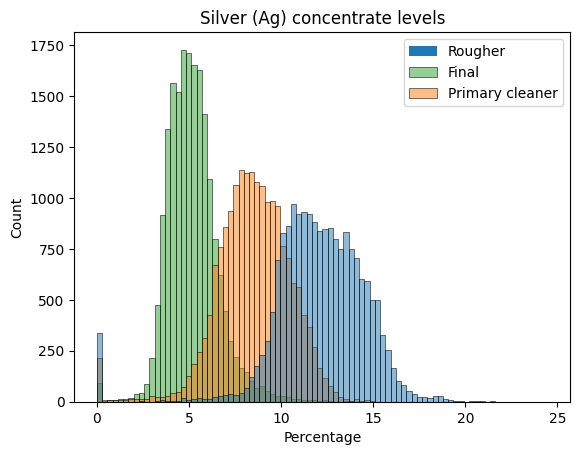

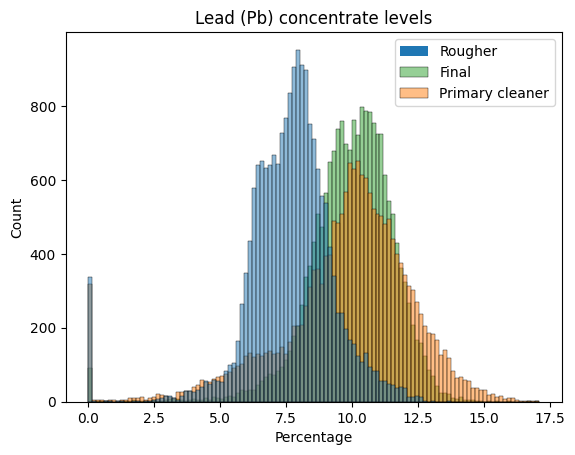

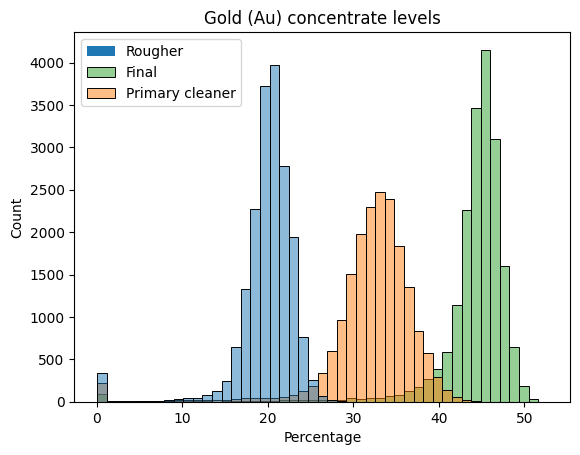

In [28]:
ag_concentrate_columns = ['rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 
                          'final.output.concentrate_ag']
pb_concentrate_columns = ['rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 
                          'final.output.concentrate_pb']
au_concentrate_columns = ['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 
                          'final.output.concentrate_au']

# Visualizing data
## Silver
g = sns.histplot(data_full[ag_concentrate_columns], legend=True)
plt.title('Silver (Ag) concentrate levels')

### Replacing legend text
plt.legend(loc='upper right', labels=['Rougher', 'Final', 'Primary cleaner'])

plt.xlabel('Percentage')
plt.show(g)


## Lead
g = sns.histplot(data_full[pb_concentrate_columns], legend=True)
plt.title('Lead (Pb) concentrate levels')

### Replacing legend text
plt.legend(loc='upper right', labels=['Rougher', 'Final', 'Primary cleaner'])

plt.xlabel('Percentage')
plt.show(g)


## Gold
g = sns.histplot(data_full[au_concentrate_columns], legend=True)
plt.title('Gold (Au) concentrate levels')

### Replacing legend text
plt.legend(loc='upper left', labels=['Rougher', 'Final', 'Primary cleaner'])

plt.xlabel('Percentage')
plt.show(g)

Findings:
- Silver concentrate levels decreased in each stage.
- Mean lead concentrate levels varied between 7.5 to 10% throughout the process.
- Gold concentrate levels increased towards the end of the process, as expected.
- The data for each element contains outliers, most notably where no output was produced (`0` percent).

Outliers can interfere with the model's learning, so it must be removed. In this case, the outliers are values which lie outside of 1.5 times the IQR (interquartile range) more than the third quartile, or 1.5 IQRs less than the first quartile.

### Removing outliers 

In [29]:
# Defining quartiles and IQRs for each element
## Silver
### Creating empty dicts to store values
ag_IQR = {}
ag_upper_bounds = {}
ag_lower_bounds = {}

### Getting values
for stage in ag_concentrate_columns:
    Q3 = data_full[stage].quantile(0.75)
    
    Q1 = data_full[stage].quantile(0.25)
    
    IQR = Q3 - Q1
    ag_IQR[stage] = IQR
    
    ag_upper_bounds[stage] = Q3 + (1.5 * IQR)
    ag_lower_bounds[stage] = Q1 - (1.5 * IQR)
    

## Lead
### Creating empty dicts to store values
pb_IQR = {}
pb_upper_bounds = {}
pb_lower_bounds = {}

### Getting values
for stage in pb_concentrate_columns:
    Q3 = data_full[stage].quantile(0.75)
    
    Q1 = data_full[stage].quantile(0.25)
    
    IQR = Q3 - Q1
    pb_IQR[stage] = IQR
    
    pb_upper_bounds[stage] = Q3 + (1.5 * IQR)
    pb_lower_bounds[stage] = Q1 - (1.5 * IQR)
    
    
## Gold
### Creating empty dicts to store values
au_IQR = {}
au_upper_bounds = {}
au_lower_bounds = {}

### Getting values
for stage in au_concentrate_columns:
    Q3 = data_full[stage].quantile(0.75)
    
    Q1 = data_full[stage].quantile(0.25)
    
    IQR = Q3 - Q1
    au_IQR[stage] = IQR
    
    au_upper_bounds[stage] = Q3 + (1.5 * IQR)
    au_lower_bounds[stage] = Q1 - (1.5 * IQR)

In [30]:
# full_reduction = ((18749 - 15603) / 18749)
# train_reduction = ((15821 - 11252) / 15821)
# test_reduction = ((5818 - 4617) / 5818)
# mean_reduction = ((full_reduction + train_reduction + test_reduction) / 3) * 100
# mean_reduction

In [31]:
# Filtering out outliers
## Looping the code over the 3 datasets didn't work,
## so I have to slice each set manually

## data_full
print('data_full shape with outliers:', data_full.shape)

### Silver
for stage in ag_concentrate_columns:
    data_full = data_full[data_full[stage] <= ag_upper_bounds[stage]]
    data_full = data_full[data_full[stage] >= ag_lower_bounds[stage]]
    
### Lead
for stage in pb_concentrate_columns:
    data_full = data_full[data_full[stage] <= pb_upper_bounds[stage]]
    data_full = data_full[data_full[stage] >= pb_lower_bounds[stage]]
    
### Gold
for stage in au_concentrate_columns:
    data_full = data_full[data_full[stage] <= au_upper_bounds[stage]]
    data_full = data_full[data_full[stage] >= au_lower_bounds[stage]]
    
print('data_full shape without outliers:', data_full.shape)

data_full shape with outliers: (18749, 87)
data_full shape without outliers: (15603, 87)


In [32]:
## data_train
print('data_train shape with outliers:', data_train.shape)

### Silver
for stage in ag_concentrate_columns:
    data_train = data_train[data_train[stage] <= ag_upper_bounds[stage]]
    data_train = data_train[data_train[stage] >= ag_lower_bounds[stage]]
    
### Lead
for stage in pb_concentrate_columns:
    data_train = data_train[data_train[stage] <= pb_upper_bounds[stage]]
    data_train = data_train[data_train[stage] >= pb_lower_bounds[stage]]
    
### Gold
for stage in au_concentrate_columns:
    data_train = data_train[data_train[stage] <= au_upper_bounds[stage]]
    data_train = data_train[data_train[stage] >= au_lower_bounds[stage]]
    
### Resetting index
data_train = data_train.reset_index(drop=True)
print('data_train shape without outliers:', data_train.shape)

data_train shape with outliers: (15821, 87)
data_train shape without outliers: (11252, 87)


In [33]:
## data_test
print('data_test shape with outliers:', data_test.shape)

### Silver
for stage in ag_concentrate_columns:
    data_test = data_test[data_test[stage] <= ag_upper_bounds[stage]]
    data_test = data_test[data_test[stage] >= ag_lower_bounds[stage]]
    
### Lead
for stage in pb_concentrate_columns:
    data_test = data_test[data_test[stage] <= pb_upper_bounds[stage]]
    data_test = data_test[data_test[stage] >= pb_lower_bounds[stage]]
    
### Gold
for stage in au_concentrate_columns:
    data_test = data_test[data_test[stage] <= au_upper_bounds[stage]]
    data_test = data_test[data_test[stage] >= au_lower_bounds[stage]]
    
### Resetting index    
data_test = data_test.reset_index(drop=True)
print('data_test shape without outliers:', data_test.shape)

data_test shape with outliers: (5818, 87)
data_test shape without outliers: (4617, 87)


We have eliminated the outliers with an average of ~22% data reduction across the 3 datasets.

## Feed particle size

As one of the features, feed particle size can affect model learning and prediction. We need to make sure that these data in both training and test sets have similar distributions.

In [34]:
# Getting particle size columns
size_columns = [i for i in full_columns if 'size' in i]
size_columns

['primary_cleaner.input.feed_size', 'rougher.input.feed_size']

In [35]:
data_train[size_columns].describe()

,primary_cleaner.input.feed_size,rougher.input.feed_size
count,11252.000000,11252.000000
mean,7.336409,58.697303
std,0.595228,22.567616
min,1.080000,0.000000
25%,6.970000,48.699100
50%,7.300000,54.626746
75%,7.700000,64.055478
max,10.470000,484.967466


In [36]:
data_test[size_columns].describe()

,primary_cleaner.input.feed_size,rougher.input.feed_size
count,4617.000000,4617.000000
mean,7.257564,55.789956
std,0.586551,16.936255
min,5.650000,0.000000
25%,6.900000,44.004420
50%,7.240000,51.287351
75%,7.590000,62.431047
max,9.770000,363.989699


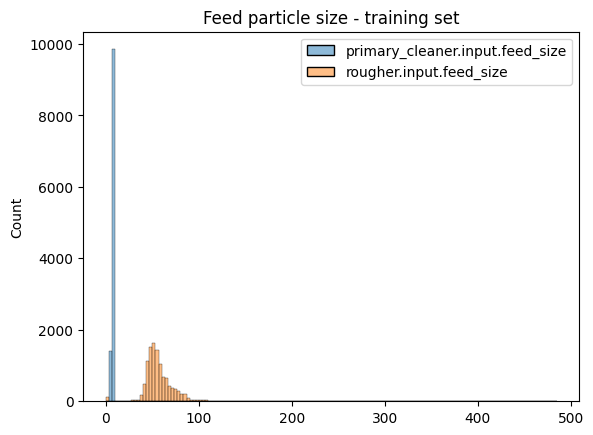

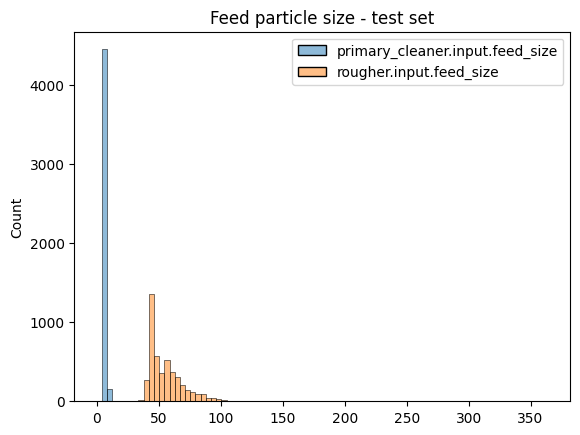

In [37]:
# Visualizing data

## data_train
sns.histplot(data_train[size_columns])
plt.title('Feed particle size - training set')
plt.show()

## data_test
sns.histplot(data_test[size_columns])
plt.title('Feed particle size - test set')
plt.show()

Primary cleaner feed size have similar variances in both sets. On the other hand, the variances of the rougher feed size are quite different. However, this issue will be solved later by scaling the data.

## Total concentrate amounts per stage

We need to inspect total concentrate amounts of all elements in each stage and check their trends to make sure that the processes were going smoothly.

In [38]:
# Getting metal concentrate columns
concentrate_columns = [i for i in full_columns if 'concentrate' in i]
concentrate_columns

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au']

In [39]:
# Getting concentrate level columns per stage:
# rougher, primary cleaner, output
rougher_columns = [i for i in concentrate_columns if (('rougher' in i) & ('sol' not in i) & ('sulfate' not in i))]
cleaner_columns = [i for i in concentrate_columns if (('cleaner' in i) & ('sol' not in i) & ('sulfate' not in i))]
final_columns = [i for i in concentrate_columns if (('final' in i) & ('sol' not in i) & ('sulfate' not in i))]

       rougher_levels  cleaner_levels  final_levels
count    15603.000000    15603.000000  15603.000000
mean        40.589228       51.828208     60.269968
std          2.920856        2.430106      1.265709
min         27.345340       34.722106     50.333283
25%         38.728136       50.599668     59.509215
50%         40.464726       52.081600     60.387969
75%         42.462181       53.397885     61.129652
max         49.700943       60.106566     64.968881


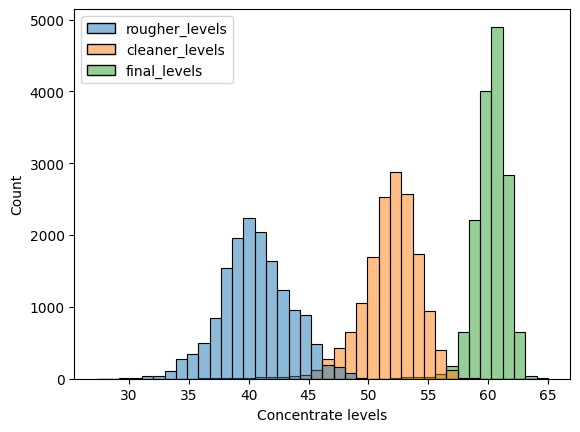

In [40]:
# Adding all concentrate values in the same observation (axis=1)
# and merging all slices into one dataframe
stage_levels = pd.DataFrame()
stage_levels['rougher_levels'] = data_full[rougher_columns].sum(axis=1)
stage_levels['cleaner_levels'] = data_full[cleaner_columns].sum(axis=1)
stage_levels['final_levels'] = data_full[final_columns].sum(axis=1)

# Showing data distribution
print(stage_levels.describe())

# Visualizing data
sns.histplot(stage_levels)
plt.xlabel('Concentrate levels')
plt.show()

As expected, the concentrate levels increased towards the final stage. The data from the three stages have similar distribution and no outliers, thanks to their removal earlier in this project.

## EDA findings

1. Substance concentrate levels increased towards the final stage, indicating sucessful extraction.
1. Feed particle size in the primary cleaner stage have similar distribution in both training and test sets, but those of the rougher stage were somewhat different. This problem will be handled by scaling in the next section to prevent distorting the model's predictions.
1. Outliers were present and have been removed.

All of these (except for point 2) means that we're ready to create our model.

# Model prototyping

Because our model needs to predict numerical target (amount of gold), we will use a linear regression model. As a comparison, we will also train a decision tree model. We will try out different hyperparameters and pick the settings with the best results.

## Feature and target separation

We need to split the datasets into two each: one that contains the features, and the other that contains the target.

The amount of pure gold we get (recover) from the processes is stored in the `rougher.output.recovery` and `final.output.recovery` column. Other columns (such as `final.output.concentrate_au` and `final.output.tail_au`), while also describing amounts of gold, refer to the processes' byproducts, not the actual target. Therefore, `rougher.output.recovery` and `final.output.recovery` will be our targets and the rest (except for `date`) will be our features.

In [41]:
# Separating features from target
train_features = data_train.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
test_features = data_test.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)

train_targets = data_train[['rougher.output.recovery', 'final.output.recovery']]
test_targets = data_test[['rougher.output.recovery', 'final.output.recovery']]

## Feature scaling: standardization

Because the features are mostly measured in different metrics, we need to scale the data to make sure that our model doesn't put more significance on features with larger figures. Scaling will also solve the problem with feed particle size distribution we found earlier.

We will use standardization to scale our features. This choice is due to the fact that normalization is used when the algorithm does not make any assumptions about the data distribution, while standardization is used when the algorithm assumes a certain data distribution. Linear regression assumes that the data is normally distributed, so standardization will serve our purposes better.

In [42]:
# Creating a standard scaler instance
standard_scaler = StandardScaler()

# Fitting the scaler to the training set
# and transforming the set
train_features = pd.DataFrame(standard_scaler.fit_transform(X=train_features.values), columns=train_features.columns)

# Transforming the test features
test_features = pd.DataFrame(standard_scaler.fit_transform(X=test_features.values), columns=test_features.columns)

## Defining the metric functions

Our client requires us to use their metric: sMAPE (symmetric Mean Absolute Percentage Error). sMAPE is defined as:

$$
    sMAPE = \frac{1}{N} \times  
\sum_{i = 1}^{N} \frac{\left |  y_{i} - y'_{i}\right |}
{(\left | y_{i} \right | + \left | y'_{i} \right |) \div 2}
\times 100\%
$$

where
- $y_{i}$ = target value of observation $i$
- $y'_{i}$ = predicted value of observation $i$
- $N$ = number of observations

The final sMAPE metric will be a calculated from the sMAPEs of two stages:

$$
    sMAPE = 25\% \times sMAPE_{rougher} + 75\% \times sMAPE_{final}
$$

Being a measure of error, the lower the score, the better.

In [43]:
# Creating a dummy variable for datatype condition
arr = np.array([1, 2, 3])

def smape(target, pred):
    """
    Calculates the symmetric Mean Absolute Percentage Error
    between the target and predicted values.
    
    Parameters:
    target: dataframe containing the target values.
    pred: dataframe containing the predicted values.
    
    Returns a percentage.
    """
    # Resetting the pred type of numpy.ndarray
    # back into a dataframe
    if type(pred) == type(arr):
        pred = pd.DataFrame(pred, columns=target.columns)
    
    # sMAPE(rougher)
    smape_rougher = np.mean(
                            (np.abs(target.iloc[:, 0] - pred.iloc[:, 0])) /
                            ((np.abs(target.iloc[:, 0]) + np.abs(pred.iloc[:, 0])) / 2) 
                            ) * 100
    # sMAPE(final)
    smape_final = np.mean(
                            (np.abs(target.iloc[:, 1] - pred.iloc[:, 1])) /
                            ((np.abs(target.iloc[:, 1]) + np.abs(pred.iloc[:, 1])) / 2) 
                            ) * 100
    
    # combined sMAPE
    combined_smape = (0.25 * smape_rougher) + (0.75 * smape_final)
    
    return combined_smape

# Integrating the function into sklearn
smape_scorer = make_scorer(smape, greater_is_better=False)

# Testing the function with a dummy prediction
# Score should be 0 since the values are exactly the same
smape(test_targets, test_targets)

0.0

## Model training and validation

We were not provided with a validation set, so we will validate our model by cross-validation, scored with our sMAPE function.

In [44]:
# Defining a function to train and cross-validate models
def score_model(model, cv=5):
    # Creating an empty list to store scores
    scores = []
    
    # Getting indices of the subtrain and valid indices 
    # Splitting the dataset `cv` times 
    for subtrain_index, valid_index in KFold(n_splits=cv).split(train_features):
        # Defining subtraining and validation sets
        subtrain_features = train_features.loc[subtrain_index].reset_index(drop=True)
        subtrain_targets = train_targets.loc[subtrain_index].reset_index(drop=True)
        valid_features = train_features.loc[valid_index].reset_index(drop=True)
        valid_targets = train_targets.loc[valid_index].reset_index(drop=True)
        
        model.fit(subtrain_features, subtrain_targets)
        pred_valid = pd.DataFrame(model.predict(valid_features))
        
        scores.append(mean_absolute_error(valid_targets, pred_valid))
        
    return pd.Series(scores).mean()

In [45]:
# Linear regression
lr = LinearRegression()
lr_score = score_model(lr)
print("Linear regression mean validation score:", lr_score)

Linear regression mean validation score: 5.915517688009638


In [46]:
# Decision tree
## Creating an empty variable to store scores and models
best_dt = None
best_dt_score = 0

## Tuning hyperparameters
for depth in range(1, 11):
    dt = DecisionTreeRegressor(max_depth=depth, random_state=12345)
    # Training & getting validation scores
    score = score_model(dt)
    
    # Storing the best score and model
    if score > best_dt_score:
        best_dt_score = score
        best_dt = dt

print('Best decision tree score:', best_dt_score)
print('Best model:')
best_dt

Best decision tree score: 6.054292504362787
Best model:


DecisionTreeRegressor(max_depth=1, random_state=12345)

Our linear regression model did better. We will choose it for the testing stage.

## Model testing

In [47]:
lr = LinearRegression()
lr.fit(train_features, train_targets)
pred = lr.predict(test_features)
smape(test_targets, pred)

5.97114798296485

Our final model completed the test with a slightly higher sMAPE of **~5.97%**.

# Conclusion

We were given three datasets to work with:
1. the full set (data_full),
1. the training set (data_train),
1. the test set (data_test).

In preprocessing, we did the following changes to the datasets:
1. Converted `date` columns in each set to `datetime` type,
1. Completed the test set with columns and values from the full set,
1. Dropped missing values in columns describing states, and
1. Filled missing values in columns describing input/output quantities with `0`.

Additionally, we confirmed that the values of gold output in the data matched the expected amounts calculated with the formula.

We found out and did the following in EDA:
1. Substance concentrate levels increased towards the final stage, indicating sucessful extraction.
1. Feed particle size in the primary cleaner stage have similar distribution in both training and test sets, but those of the rougher stage were somewhat different. This problem was solved by scaling the features.
1. Outliers were present and have been removed.

In the ML stage, we scaled the data and defined a custom metric, the symmetric Mean Absolute Percentage Error (sMAPE) as instructed. We trained and cross-validated two models: a linear regression model and a decision tree regressor, but the linear regression model did better with **~5.91%** sMAPE. We proceeded to test it and got a result of **~5.97%** sMAPE, a slight increase in error scores. The model should now be ready for use.